# Homework 10: Model selection

This homework is designed to give you practice implementing model selection techniques, including best subset selection and forward/backward stepwise selection.

You won't need to load in any data for this homework, we will be simulating our own.

---
## 1. Best subset selection (4 points)

In this question, we will first generate simulated data, and then use it to perform best subset selection.

a) Use `rnorm()` to generate a dataset including a predictor $X$ of length $n = 100$ and a noise vector $\epsilon$ of length $n = 100$. Generate data for a response variable $Y$ of length $n = 100$ according to the model

$Y = \beta_0 + \beta_1X + \beta_2X^2 + \beta_3X^3 + \epsilon$

where $\beta_0$, $\beta_1$, $\beta_2$, and $\beta_3$ are constants of your choice.


In [2]:
n = 100

beta_0 = 1 
beta_1 = 0.5
beta_2 = 3
beta_3 = 4

x <- rnorm(n, mean = 5, sd = 2)
e <- rnorm(n, mean = 0, sd = .5)

y <- beta_0 + beta_1 * x + beta_2 * x^2 + beta_3 * x^3 + e

data <- as.data.frame(cbind(x, y))
colnames(data)  <- c('x', 'y')

b) Use `regsubsets()` to perform best subset selection to determine the best model that contains the predictor variables $X$, $X^2$, . . . , $X^{10}$. Print the model summary.

For this you will need to install and load the _leaps_ library.

In [4]:
library(leaps)

sub_sel <- regsubsets(y ~ poly(x, 10, raw = TRUE), data = data, nvmax = 10)

sub_sel_summary <- summary(sub_sel)

summary(sub_sel)

Subset selection object
Call: regsubsets.formula(y ~ poly(x, 10, raw = TRUE), data = data, 
    nvmax = 10)
10 Variables  (and intercept)
                          Forced in Forced out
poly(x, 10, raw = TRUE)1      FALSE      FALSE
poly(x, 10, raw = TRUE)2      FALSE      FALSE
poly(x, 10, raw = TRUE)3      FALSE      FALSE
poly(x, 10, raw = TRUE)4      FALSE      FALSE
poly(x, 10, raw = TRUE)5      FALSE      FALSE
poly(x, 10, raw = TRUE)6      FALSE      FALSE
poly(x, 10, raw = TRUE)7      FALSE      FALSE
poly(x, 10, raw = TRUE)8      FALSE      FALSE
poly(x, 10, raw = TRUE)9      FALSE      FALSE
poly(x, 10, raw = TRUE)10     FALSE      FALSE
1 subsets of each size up to 10
Selection Algorithm: exhaustive
          poly(x, 10, raw = TRUE)1 poly(x, 10, raw = TRUE)2
1  ( 1 )  " "                      " "                     
2  ( 1 )  " "                      "*"                     
3  ( 1 )  " "                      "*"                     
4  ( 1 )  " "                      "*"   

In [ ]:
# Note: if your model summary doesn't show up when viewing your notebook on github, copy and paste the output below.
# Otherwise you can either delete this cell or leave it blank.

```
# paste here

```

c) Plot the Mallows' Cp, Bayesian Information Criteria (BIC) and the adjusted coefficient of determination, $R^2$, for each model tested. Which is the best model? Report the coefficients of the best model. 

[1] 3

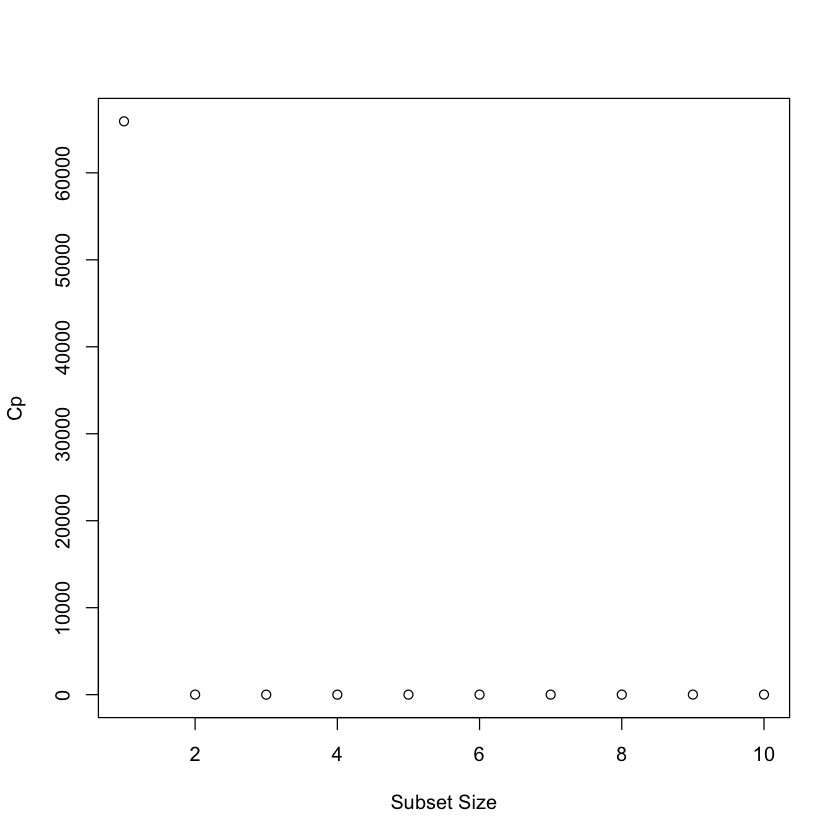

[1] 3

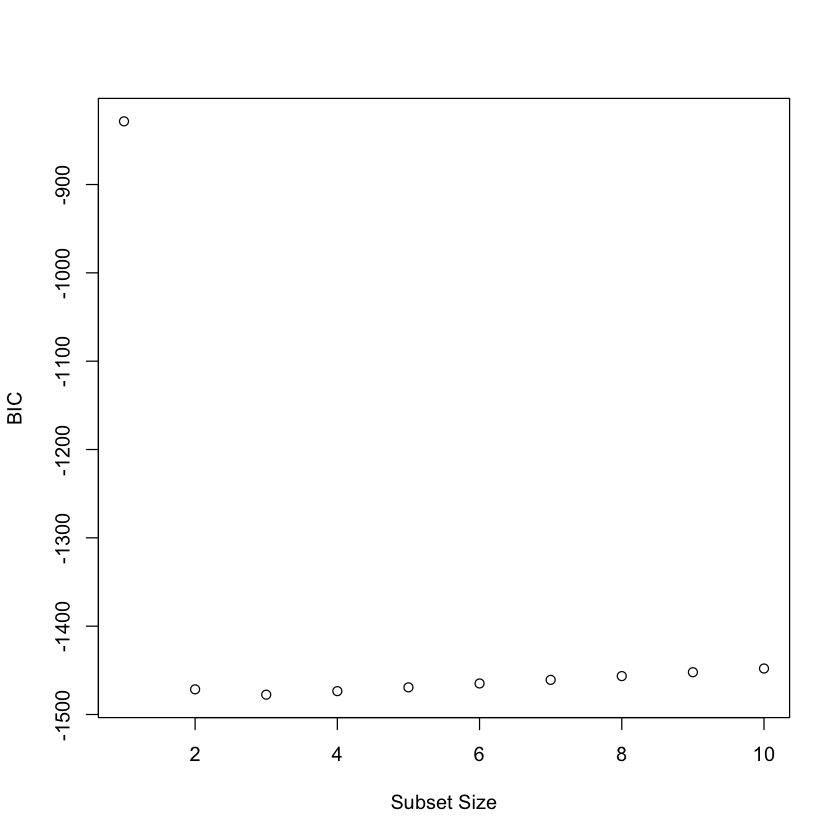

[1] 3

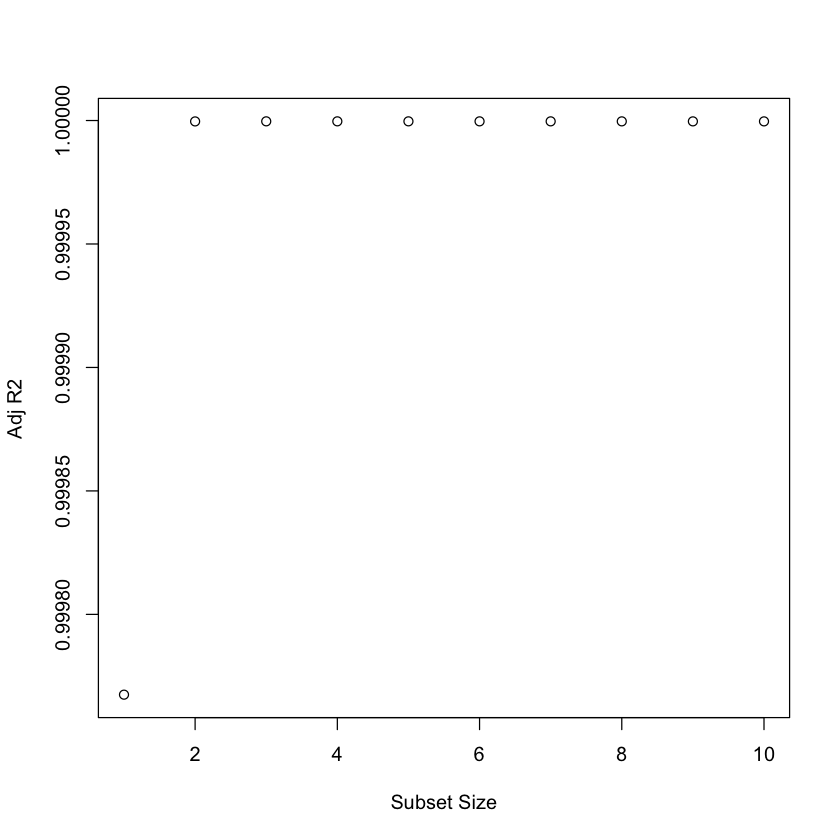

In [9]:
plot(sub_sel_summary$cp, xlab="Subset Size", ylab="Cp")
which(sub_sel_summary$cp == min(sub_sel_summary$cp)) #best model for cp = 3

plot(sub_sel_summary$bic, xlab="Subset Size", ylab="BIC")
which(sub_sel_summary$bic == min(sub_sel_summary$bic)) #best model for bic = 3

plot(sub_sel_summary$adjr2, xlab="Subset Size", ylab="Adj R2")
which(sub_sel_summary$adjr2 == max(sub_sel_summary$adjr2)) #best model for adjr2 = 3



In [8]:
# coefficients for best model
coefficients(sub_sel, id=3)

(Intercept) poly(x, 10, raw = TRUE)2 poly(x, 10, raw = TRUE)3 
             1.031551195              3.242745677              3.960463974 
poly(x, 10, raw = TRUE)4 
             0.002092119

> All the criteria picked a model with 3 parameters. The polynomials 2, 3, and 4 were selected.
> The coefficients of the selected model are as follows:
> intercept: 1,
> beta_1: 3.24,
> beta_2: 3.96,
> beta_3: 0.002

---
## 2. Forward and backwards stepwise selection (3 points)

Using the same simulated data from question 1, use forward stepwise selection, and backwards stepwise selections to determine the best model. Again, for both model selection methods, plot the Mallows' Cp, Bayesian Information Criteria (BIC) and the adjusted coefficient of determination, $R^2$, for each model tested. Report the coefficients of the best model. 

a) Forward stepwise selection:

In [10]:
forward_sel_subset <- regsubsets(y ~ poly(x, 10, raw = TRUE), data = data, nvmax = 10, method = 'forward')
forward_sel_summary <- summary(forward_sel_subset)

forward_sel_summary

Subset selection object
Call: regsubsets.formula(y ~ poly(x, 10, raw = TRUE), data = data, 
    nvmax = 10, method = "forward")
10 Variables  (and intercept)
                          Forced in Forced out
poly(x, 10, raw = TRUE)1      FALSE      FALSE
poly(x, 10, raw = TRUE)2      FALSE      FALSE
poly(x, 10, raw = TRUE)3      FALSE      FALSE
poly(x, 10, raw = TRUE)4      FALSE      FALSE
poly(x, 10, raw = TRUE)5      FALSE      FALSE
poly(x, 10, raw = TRUE)6      FALSE      FALSE
poly(x, 10, raw = TRUE)7      FALSE      FALSE
poly(x, 10, raw = TRUE)8      FALSE      FALSE
poly(x, 10, raw = TRUE)9      FALSE      FALSE
poly(x, 10, raw = TRUE)10     FALSE      FALSE
1 subsets of each size up to 10
Selection Algorithm: forward
          poly(x, 10, raw = TRUE)1 poly(x, 10, raw = TRUE)2
1  ( 1 )  " "                      " "                     
2  ( 1 )  " "                      "*"                     
3  ( 1 )  " "                      "*"                     
4  ( 1 )  " "           

[1] 3

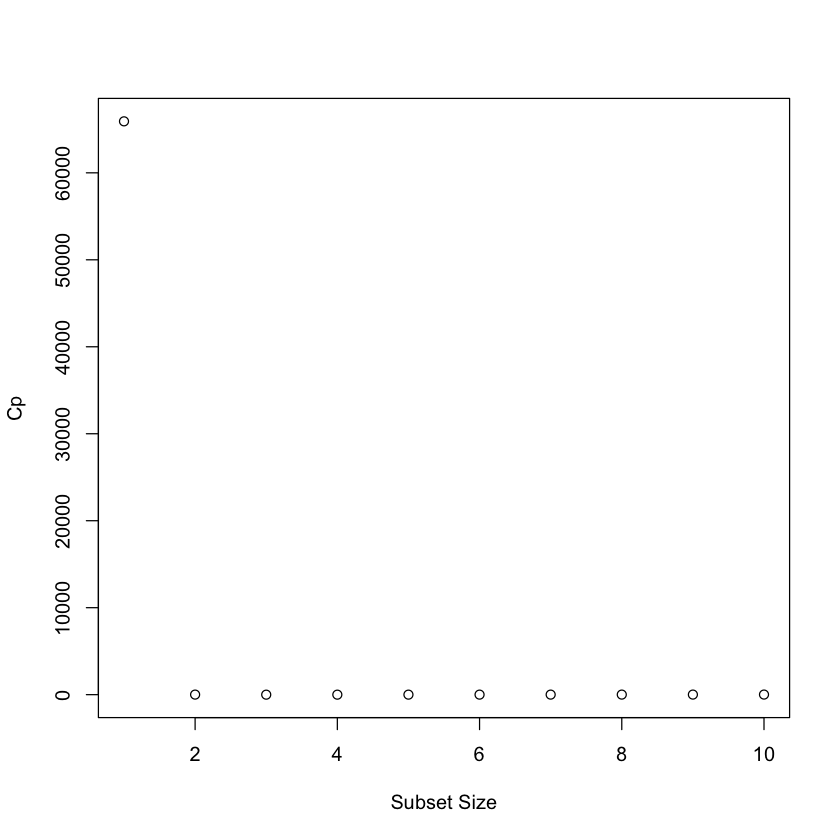

[1] 3

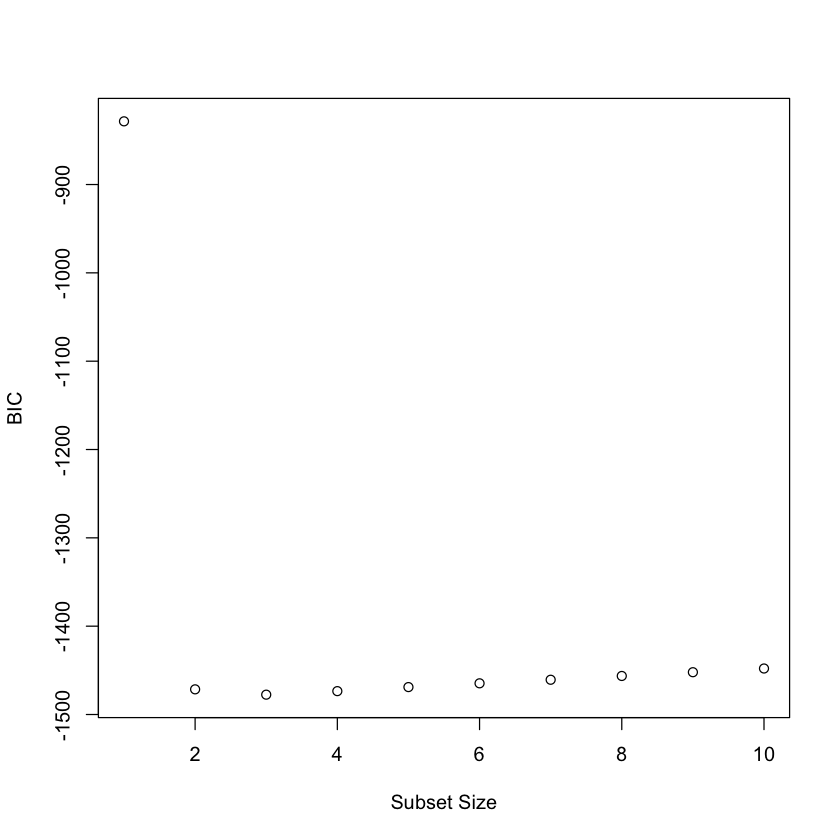

[1] 3

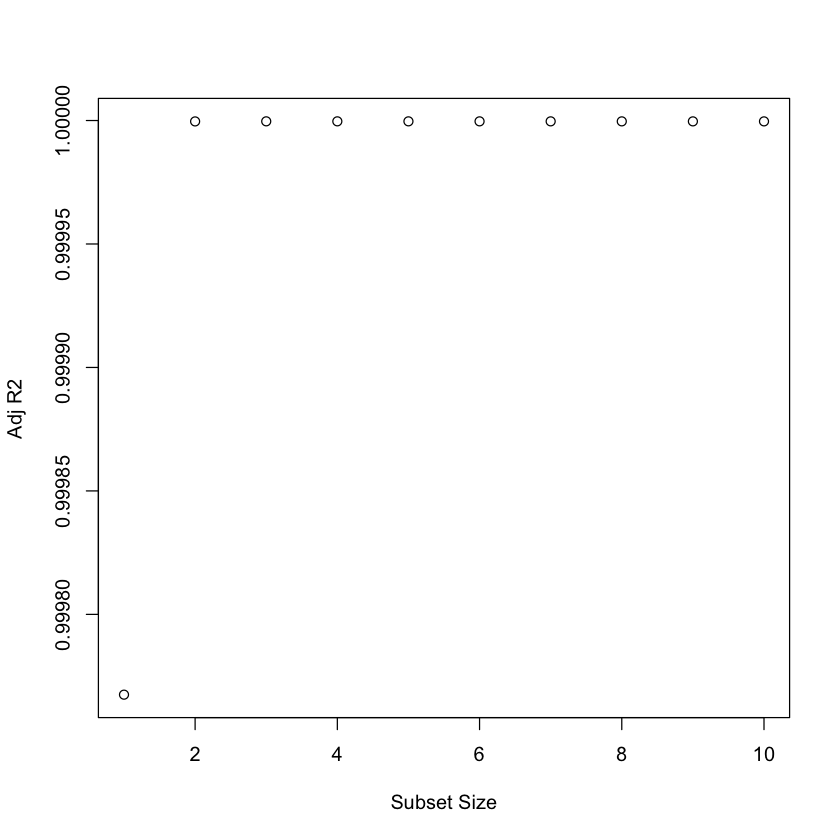

In [12]:
plot(forward_sel_summary$cp, xlab="Subset Size", ylab="Cp")
which(forward_sel_summary$cp == min(forward_sel_summary$cp))

plot(forward_sel_summary$bic, xlab="Subset Size", ylab="BIC")
which(forward_sel_summary$bic == min(forward_sel_summary$bic))

plot(forward_sel_summary$adjr2, xlab="Subset Size", ylab="Adj R2")
which(forward_sel_summary$adjr2 == max(forward_sel_summary$adjr2))

In [16]:
# Best model coefficients : forward selection 

coefficients(forward_sel_subset, id=3)

(Intercept) poly(x, 10, raw = TRUE)2 poly(x, 10, raw = TRUE)3 
             1.031551195              3.242745677              3.960463974 
poly(x, 10, raw = TRUE)4 
             0.002092119

In [ ]:
# Note: if your model summary doesn't show up when viewing your notebook on github, copy and paste the output below.
# Otherwise you can either delete this cell or leave it blank.

```
# paste here

```

b) Backwards stepwise selection:

In [13]:
backward_sel_subset <- regsubsets(y ~ poly(x, 10, raw = TRUE), data = data, nvmax = 10, method = 'backward')
backward_sel_summary <- summary(backward_sel_subset)

backward_sel_summary

Subset selection object
Call: regsubsets.formula(y ~ poly(x, 10, raw = TRUE), data = data, 
    nvmax = 10, method = "backward")
10 Variables  (and intercept)
                          Forced in Forced out
poly(x, 10, raw = TRUE)1      FALSE      FALSE
poly(x, 10, raw = TRUE)2      FALSE      FALSE
poly(x, 10, raw = TRUE)3      FALSE      FALSE
poly(x, 10, raw = TRUE)4      FALSE      FALSE
poly(x, 10, raw = TRUE)5      FALSE      FALSE
poly(x, 10, raw = TRUE)6      FALSE      FALSE
poly(x, 10, raw = TRUE)7      FALSE      FALSE
poly(x, 10, raw = TRUE)8      FALSE      FALSE
poly(x, 10, raw = TRUE)9      FALSE      FALSE
poly(x, 10, raw = TRUE)10     FALSE      FALSE
1 subsets of each size up to 10
Selection Algorithm: backward
          poly(x, 10, raw = TRUE)1 poly(x, 10, raw = TRUE)2
1  ( 1 )  " "                      " "                     
2  ( 1 )  " "                      "*"                     
3  ( 1 )  " "                      "*"                     
4  ( 1 )  " "         

[1] 4

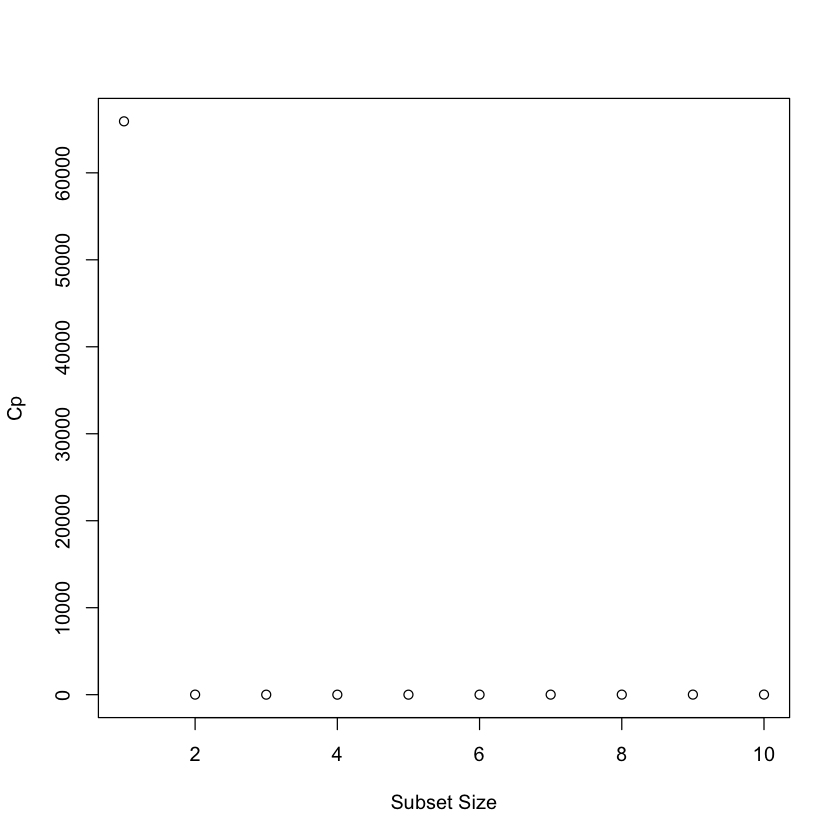

[1] 3

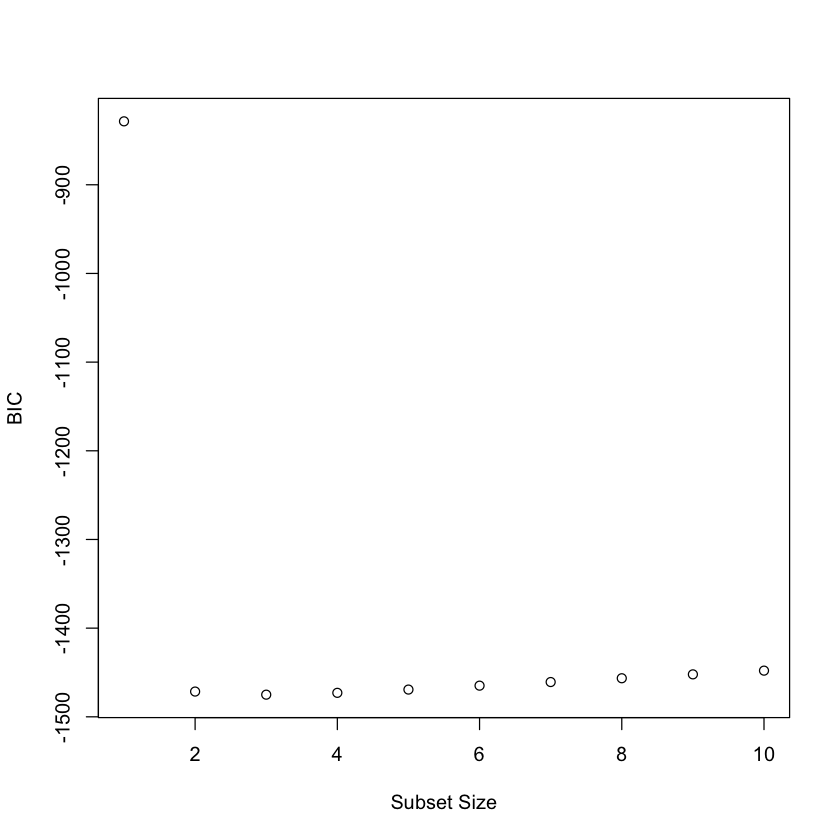

[1] 4

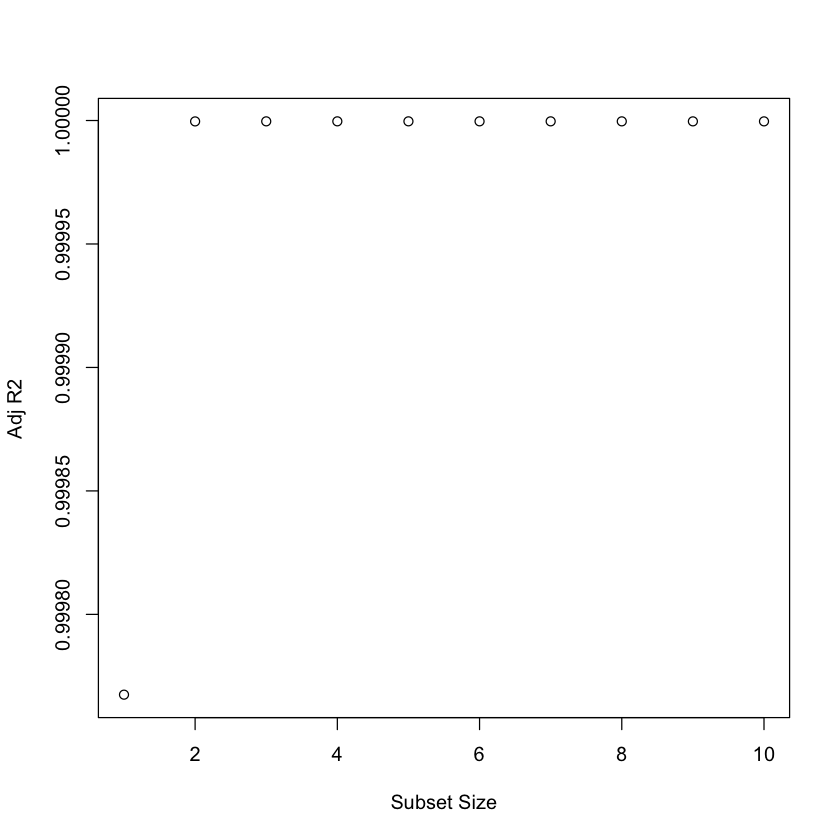

In [15]:
plot(backward_sel_summary$cp, xlab="Subset Size", ylab="Cp")
which(backward_sel_summary$cp == min(backward_sel_summary$cp))

plot(backward_sel_summary$bic, xlab="Subset Size", ylab="BIC")
which(backward_sel_summary$bic == min(backward_sel_summary$bic))

plot(backward_sel_summary$adjr2, xlab="Subset Size", ylab="Adj R2")
which(backward_sel_summary$adjr2 == max(backward_sel_summary$adjr2))

In [17]:
# Best model coefficients : forward selection 

coefficients(backward_sel_subset, id=4)

(Intercept) poly(x, 10, raw = TRUE)2 poly(x, 10, raw = TRUE)3 
            1.045797e+00             3.210644e+00             3.976513e+00 
poly(x, 10, raw = TRUE)8 poly(x, 10, raw = TRUE)9 
            4.495719e-07            -3.787198e-08

In [ ]:
# Note: if your model summary doesn't show up when viewing your notebook on github, copy and paste the output below.
# Otherwise you can either delete this cell or leave it blank.

```
# paste here

```

c) Compare your results from parts a and b with those of question 1.

> Forward subset selection also unanimously chose the model with 3 predictors. Backwards subset selection selected the model with 3 predictors when using the BIC, but the other two selected the model with 4 predictors.
> None of the three methods got the true model exactly right, usually not returning the effect of the x^1 predictor that was included during data generation. 

---
## 3. Training and test error (3 points)

This question will explore the relationship between training and test error and the number of features included in a model. We will again use a simulated dataset. 

a) Simulate dataset with features $p = 20$ and observations $n = 1,000$. Generate data for a response variable $Y$ according to the model

$Y = X\beta + \epsilon$ 

where $\beta$ is random with some elements that are exactly zero.

Split your simulated dataset into a training set containing $n=100$ observations and a test set containing $n=900$ observations.

In [50]:
p = 20 
n = 1000

b <- sample(c(-4:4), p, replace = TRUE)
b[sample(p,5)] <- 0 # make sure some are set to 0
which(b==0)

x <- replicate(p,sample(0:p,n,rep=TRUE)) # matrix of p columns, n rows of random integers between 0 and 20

e <- rnorm(n, mean = 0, sd = 10)

y <-  (x %*% b) + e

data <- as.data.frame(cbind(y, x))

# split 

train_idxs <- sample(n, 100) #  100 random observations for training...
test_idxs <- setdiff(c(1:n),train_idxs) # .. the other 900 for testings

train_x <- x[train_idxs,]
train_y <- y[train_idxs,]

colnames(train_x) <- colnames(x, do.NULL=FALSE, prefix="x")

test_x <- x[test_idxs,]
test_y <- y[test_idxs,]

colnames(test_x) <- colnames(x, do.NULL=FALSE, prefix="x")


[1]  4  5  7 10 15 17

b) Perform best subset selection on the training set, and plot the associated training and test set MSE for the best model of each size.

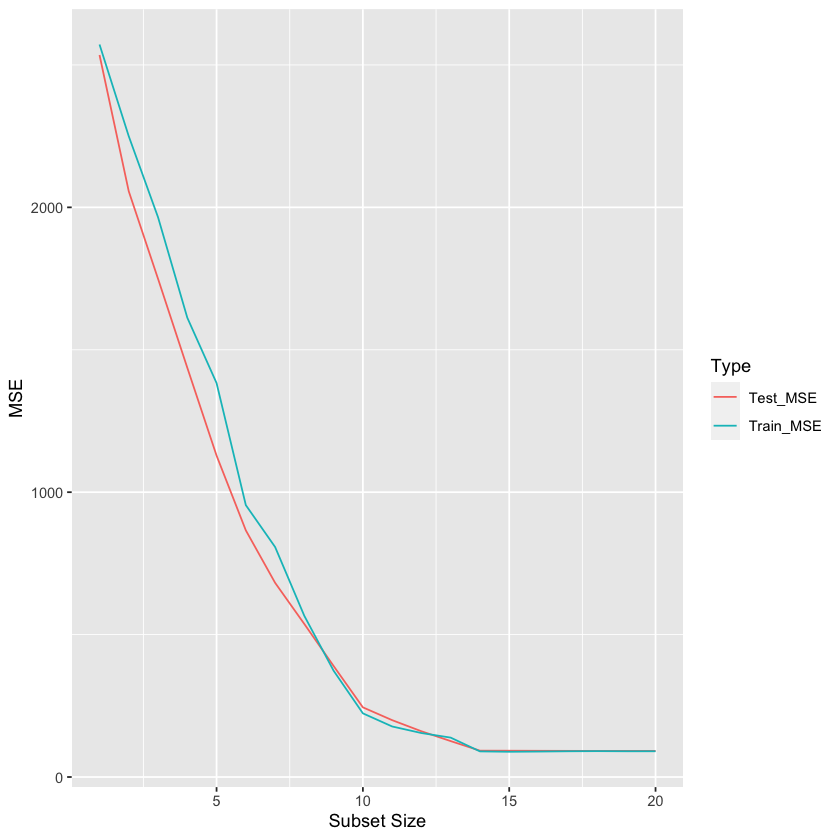

In [51]:
library('tidyverse')

sub_sel_train <- regsubsets(y ~ x, data = as.data.frame(x = train_x, y = train_y), nvmax = 20)

train_mse <- matrix(nrow = p)
test_mse <- matrix(nrow = p)

for(m in 1:p) {
  model <- coef(sub_sel_train, id = m)
  coefs <- which(colnames(train_x) %in% names(model[-1]))
  if(m == 1) {
    train_predict <- model[1] + train_x[ , coefs] * model[-1]
    test_predict <- model[1] + test_x[ , coefs] * model[-1] 
  } else{
  train_predict <- model[1] + train_x[ , coefs] %*% model[-1] 
  
  test_predict <- model[1] + test_x[ , coefs] %*% model[-1] 
  }
  train_mse[m] <- mean((train_y - train_predict)^2)
  test_mse[m] <- mean((test_y - test_predict)^2)
}

mse <- as.data.frame(cbind(1:p, train_mse, test_mse))
colnames(mse) <- c('Subset_Size', 'Train_MSE', 'Test_MSE')
mse_long <- pivot_longer(mse, cols = c('Train_MSE', 'Test_MSE'))

ggplot(data = mse_long, aes(x = Subset_Size, y = value, color = name)) +
  geom_line() +
  labs(x = 'Subset Size',
       y = 'MSE',
       color = 'Type')





c) Identify the best model according the test MSE. How does this model compare to the actual model used to simulate the dataset?

*Note: If the model identified contains only an intercept or all of the features, then generate a new dataset (i.e. repeat part a with a different random seed) until the test set MSE is minimized for an intermediate model size.*

In [52]:
optimal <- which.min(mse$Test_MSE)
optimal

coef(sub_sel_train, id = optimal)


[1] 18

(Intercept)          x1          x2          x3          x4          x5 
 1.51857850  1.00198371 -2.99944213 -1.99206006  0.05432854  0.09319184 
         x6          x7          x8          x9         x11         x12 
 2.96100295 -0.05149026 -1.02822333 -1.97866127 -2.05350583 -3.02938551 
        x13         x14         x15         x16         x18         x19 
-3.01707829 -1.01416899 -0.07321938 -4.03500984 -2.94628779  0.97458136 
        x20 
-2.01397456

> The true zero betas were 4, 5, 7, 10, 15, & 17. The 4th, 5th, 7th, and 15th predictors were included in this model, so some of of the unimportant predictors survived subset selection. However, the subset selection did correctly removed the 10th and 17th predictors. It did not remove any predictors that had non-zero betas.
> 

**DUE:** 5pm EST, April 15th, 2022

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here. 
> Asal, Emefa, Julia